In [4]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

tips = sns.load_dataset('tips')

In [3]:
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [5]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
# 1. data overview
print(tips.describe)


<bound method NDFrame.describe of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>


In [8]:
print("\n === Checking for missing values ===")
print(tips.isnull().sum())


 === Checking for missing values ===
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


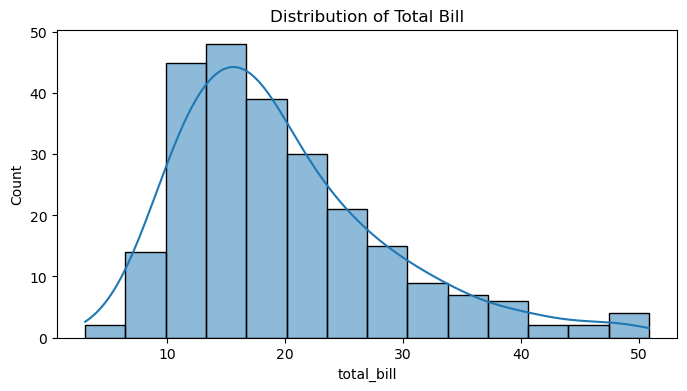

In [11]:
# 2 univarite analysis

# histogram + KDE for total bill

plt.figure(figsize =(8,4))
sns.histplot(tips['total_bill'], kde = True)
plt.title('Distribution of Total Bill')
plt.show()

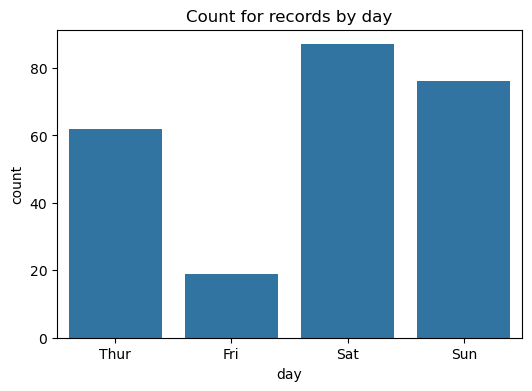

In [12]:
# counPlot for day

plt.figure(figsize=(6,4))
sns.countplot(x='day',data = tips)
plt.title('Count for records by day')
plt.show()

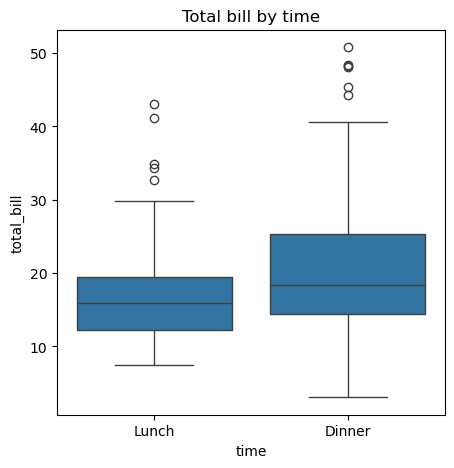

In [13]:
# box plot for the total bill by time

plt.figure(figsize=(5,5))
sns.boxplot(x='time',y= 'total_bill',data = tips)
plt.title('Total bill by time')
plt.show()

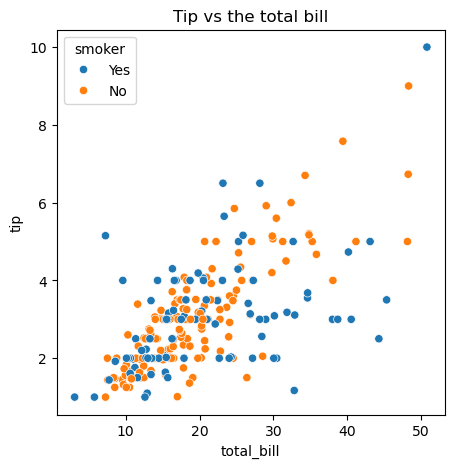

In [17]:
# scatter plot- Total bill vs tip

plt.figure(figsize =(5,5))
sns.scatterplot(x = 'total_bill',y = 'tip', data = tips, hue = 'smoker')
plt.title('Tip vs the total bill')
plt.show()

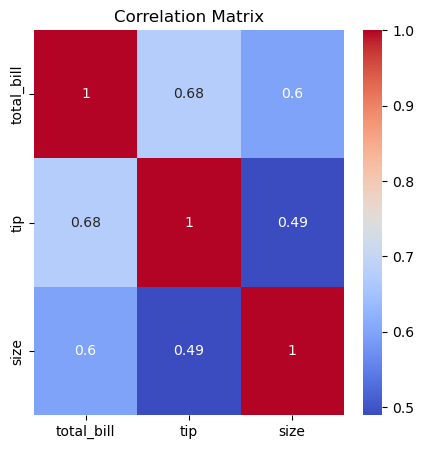

In [19]:
# correlation analysis
# compute correlation matrix for numeric columns

corr = tips.corr(numeric_only = True)

plt.figure(figsize = (5,5))
sns.heatmap(corr,annot = True, cmap ='coolwarm')
plt.title('Correlation Matrix')
plt.show()


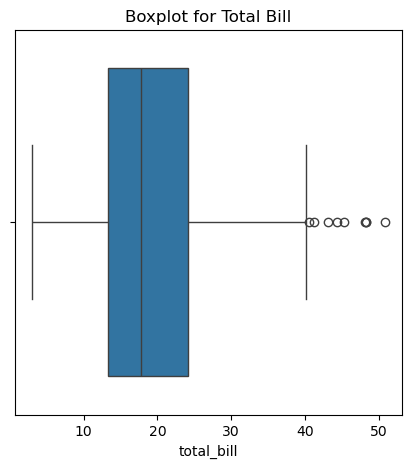

In [20]:
# outlier Detection using Boxplot

plt.figure(figsize= (5,5))
sns.boxplot(x=tips['total_bill'])
plt.title('Boxplot for Total Bill')
plt.show()

In [23]:
# outlier removal  (IQR method)
Q1 = tips['total_bill'].quantile(0.25)
Q3 = tips['total_bill'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 - 1.5*IQR
tips_clean = tips[(tips['total_bill']>= lower_bound) & (tips['total_bill'] <= upper_bound)]

print(f"original Dataset size:{tips.shape[0]}")
print(f"Dataset size after removing outliers :{tips_clean.shape[0]}")

original Dataset size:244
Dataset size after removing outliers :7


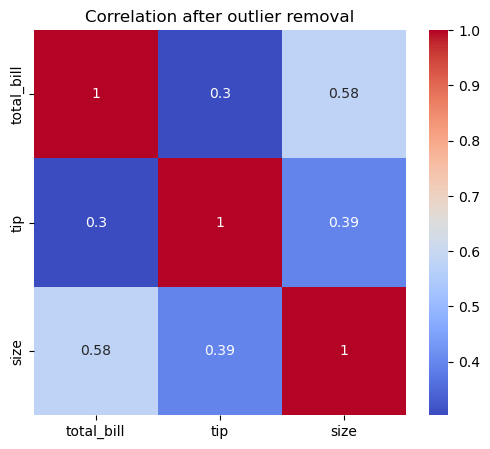

In [26]:
# correlation after Outlier Removal
corr_clean = tips_clean.corr(numeric_only = True)

plt.figure(figsize= (6,5))
sns.heatmap(corr_clean,annot=True, cmap='coolwarm')
plt.title('Correlation after outlier removal')
plt.show()



